# Vector projections 

## first sub task 

### Mathematical description and problem Setup


Given two vectors $$ \mathbf{a}, \mathbf{b} \in \mathbb{R}^2 $$,  
the **projection of** $$ \mathbf{a} $$ **onto** $$ \mathbf{b} $$ represents the component of $$ \mathbf{a} $$ that lies along the direction of $$ \mathbf{b} $$.  
Geometrically, it is the *shadow* of $$ \mathbf{a} $$ on the line defined by $$ \mathbf{b} $$

We compute this projection in two ways:

1. **Analytical (closed form)** — from vector algebra.  
2. **Gradient Descent (iterative)** — from minimizing a least-squares cost.

Lets define it. 


###  Analytical projection (Closed form)


####  Definition via Dot Product



The projection of $$ \mathbf{a} $$ onto $$ \mathbf{b} $$ is given by:

$$
\operatorname{proj}_{\mathbf{b}}(\mathbf{a})
= \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}} \, \mathbf{b}, 
\qquad \text{for } \mathbf{b}\neq \mathbf{0}.
$$

Where:

- $$ \mathbf{a}\cdot\mathbf{b} $$ → alignment between vectors.  
- $$ \mathbf{b}\cdot\mathbf{b} = \|\mathbf{b}\|^2 $$ → squared magnitude of $$ \mathbf{b} $$.  
- Scalar coefficient:

$$
c^\star = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}
$$

Hence:

$$
\operatorname{proj}_{\mathbf{b}}(\mathbf{a}) = c^\star \mathbf{b}
$$

 If $$ \mathbf{b} = \mathbf{0} $$, the projection is undefined (or zero by convention).



####  Least-Squares Derivation



We can derive the same result by minimizing:

$$
\min_{c\in\mathbb{R}} \; J(c) = \|\mathbf{a} - c\mathbf{b}\|^2
$$

Expanding the cost:

$$
J(c) = (\mathbf{a}-c\mathbf{b})^\top(\mathbf{a}-c\mathbf{b})
     = \mathbf{a}^\top\mathbf{a} - 2c(\mathbf{a}^\top\mathbf{b}) + c^2(\mathbf{b}^\top\mathbf{b})
$$

Setting derivative to zero:

$$
\frac{dJ}{dc} = -2(\mathbf{a}\cdot\mathbf{b}) + 2c(\mathbf{b}\cdot\mathbf{b}) = 0
\Rightarrow
c^\star = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}
$$

Got same solution as before.

####  Orthogonal Decomposition



Let:

$$
\mathbf{p} = \operatorname{proj}_{\mathbf{b}}(\mathbf{a}) = c^\star \mathbf{b}
$$

$$
\mathbf{r} = \mathbf{a} - \mathbf{p}
$$

Then:

$$
\mathbf{a} = \mathbf{p} + \mathbf{r}, \quad \mathbf{r}\cdot\mathbf{b} = 0
$$

That is, the residual $$ \mathbf{r} $$ is **orthogonal** to $$ \mathbf{b} $$.

And by the Pythagorean theorem:

$$
\|\mathbf{a}\|^2 = \|\mathbf{p}\|^2 + \|\mathbf{r}\|^2
$$


####  Angle Interpretation


If $$ \theta $$ is the angle between $$ \mathbf{a} $$ and $$ \mathbf{b} $$:

$$
\mathbf{a}\cdot\mathbf{b} = \|\mathbf{a}\|\,\|\mathbf{b}\|\,\cos\theta
\Rightarrow
c^\star = \frac{\|\mathbf{a}\|\cos\theta}{\|\mathbf{b}\|}
$$

Thus, the **length of the projection** is $$ \|\mathbf{a}\|\cos\theta $$.


### proceed with the gradiente descent algorithm


####  Gradient descent formulation


We minimize the same cost iteratively:

$$
J(c) = \|\mathbf{a} - c\mathbf{b}\|^2 
= \mathbf{a}^\top\mathbf{a} - 2c(\mathbf{a}^\top\mathbf{b}) + c^2(\mathbf{b}^\top\mathbf{b})
$$


#### Gradient and update rule




Derivative:

$$
\frac{dJ}{dc} = -2(\mathbf{a}\cdot\mathbf{b}) + 2c(\mathbf{b}\cdot\mathbf{b})
$$

Gradient descent update:

$$
c_{k+1} = c_k - \eta \frac{dJ}{dc}
= c_k - \eta[-2(\mathbf{a}\cdot\mathbf{b}) + 2c_k(\mathbf{b}\cdot\mathbf{b})]
$$

Simplified:

$$
c_{k+1} = (1 - 2\eta\|\mathbf{b}\|^2)c_k + 2\eta(\mathbf{a}\cdot\mathbf{b})
$$

At convergence:

$$
c^\star = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}
$$



#### Convergence condition


Convergence requires:

$$
0 < \eta < \frac{1}{\|\mathbf{b}\|^2}
$$

A safer bound (from Lipschitz constant $$ L=2\|\mathbf{b}\|^2 $$):

$$
0 < \eta < \frac{1}{2\|\mathbf{b}\|^2}
$$

Convergence rate:

$$
|c_k - c^\star| \le \rho^k |c_0 - c^\star|, \quad \rho = |1 - 2\eta\|\mathbf{b}\|^2| < 1
$$

####  Practical Notes

- Large $$ \|\mathbf{b}\| $$ → use smaller $$ \eta $$.  
- Stop when $$ |c_{k+1}-c_k| < \varepsilon $$ or cost stops decreasing.  
- If $$ \mathbf{b}=0 $$ → gradient vanishes → undefined projection.

### code implementation

#### libraries 

on this case, simply use numpy and matplotlib to manage and plot data 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### setting up vectors

In [3]:
a = np.array([2.0, 7.0])   # vector being projected
b = np.array([1.0, 2.0])   # direction (onto which 'a' is projected)


see vectors on space: 

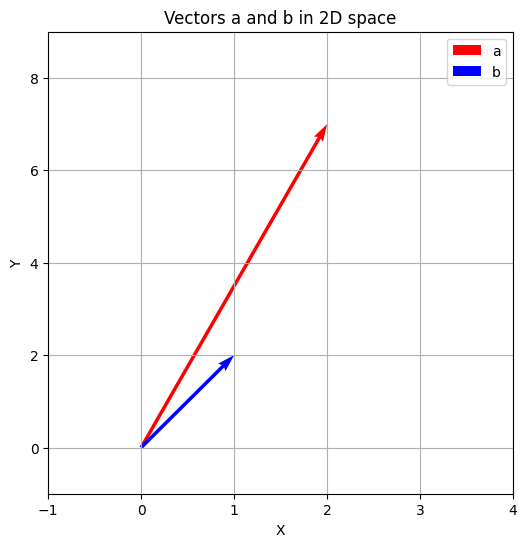

a = [2. 7.]
b = [1. 2.]


In [4]:
plt.figure(figsize=(6,6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', label='a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='b')
plt.xlim(-1, max(a[0], b[0]) + 2)
plt.ylim(-1, max(a[1], b[1]) + 2)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Vectors a and b in 2D space')
plt.show()



print("a =", a)
print("b =", b)


also, we can precompute a basic dot product, that it's used by both methods

In [5]:
dot_ab = np.dot(a, b)      # a · b
dot_bb = np.dot(b, b)      # b · b = ||b||^2
norm_b = np.sqrt(dot_bb)   # ||b|| (used only for scalar-projection interpretation)

print("a·b =", dot_ab, "   b·b   =", dot_bb, "   ||b|| =", norm_b)

a·b = 16.0    b·b   = 5.0    ||b|| = 2.23606797749979


#### analytical projection  (closed form)

for the analytical scalar c* =  (a·b) / (b·b) , we evaluate the posible cases. (when b ==0, the projection is the zero vector)

In [6]:
if dot_bb == 0.0:
    c_star = 0.0
else:
    c_star = dot_ab / dot_bb

also, calculate the projected vector p* = c * b 

In [7]:
analyticalProjection = c_star * b 
# then print, the output
print("Analytical scalar c* =", c_star)
print("Analytical projection p* =", analyticalProjection)

Analytical scalar c* = 3.2
Analytical projection p* = [3.2 6.4]


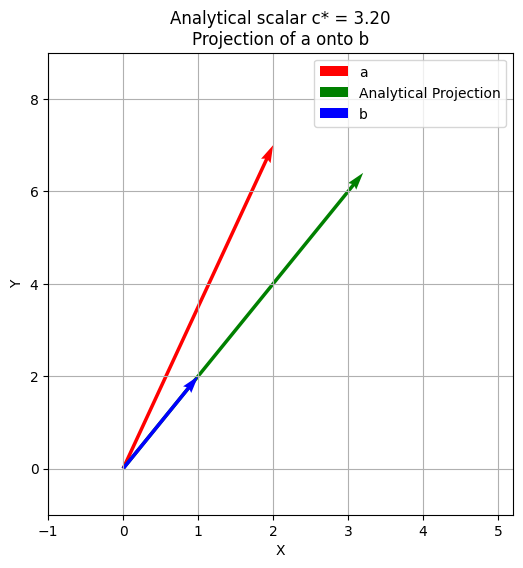

In [8]:
plt.figure(figsize=(6,6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', label='a')
plt.quiver(0, 0, analyticalProjection[0], analyticalProjection[1], angles='xy', scale_units='xy', scale=1, color='g', label='Analytical Projection')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='b')
plt.xlim(-1, max(a[0], analyticalProjection[0], b[0]) + 2)
plt.ylim(-1, max(a[1], analyticalProjection[1], b[1]) + 2)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Analytical scalar c* = {c_star:.2f}\nProjection of a onto b')
plt.show()

besides, can calculate the scalar projection length along the unit-b direciton :  (a·b)/||b|| 




In [9]:
scalar_length_along_b = 0.0 if norm_b == 0.0 else dot_ab / norm_b
print("Scalar projection length of a onto b (|a| cosθ) =", scalar_length_along_b)

Scalar projection length of a onto b (|a| cosθ) = 7.155417527999327


then, we can visualize on space

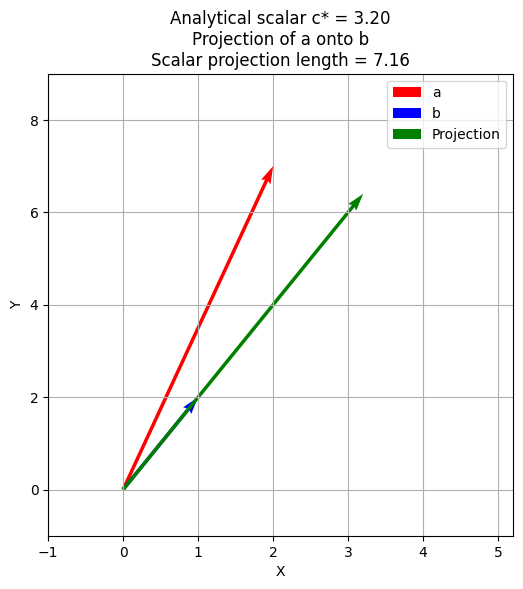

In [10]:
plt.figure(figsize=(6,6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', label='a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='b')
plt.quiver(0, 0, analyticalProjection[0], analyticalProjection[1], angles='xy', scale_units='xy', scale=1, color='g', label='Projection')
plt.xlim(-1, max(a[0], analyticalProjection[0], b[0]) + 2)
plt.ylim(-1, max(a[1], analyticalProjection[1], b[1]) + 2)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Analytical scalar c* = {c_star:.2f}\nProjection of a onto b\nScalar projection length = {scalar_length_along_b:.2f}')
plt.show()

now, proceed with the gradien descent (least squares) method

#### Gradiente descent method

in this case, we minimize $$  J(c) = || a - c b ||^2 = a·a - 2c(a·b) + c^2 (b·b)$$ , where the gradient its defined by: 

$$dJ/dc = -2(a·b) + 2c(b·b)$$

first, we set the hyperparameters: 

In [11]:
eta = 0.01 # learning rate 
iterations = 500 # number of iterations 



proceed with the initialization 

In [12]:
c = 0.0 #  start at  c = 0
costHistory = [] # to visualize convergence of c
JHistory = [] # to visualize the cost decay


also define some constants used inside the loop that doesnt change through iteraitons

In [13]:
dot_aa = np.dot(a,a) # a·a

from here, proceed with the gradient descentloop 

In [14]:
for i in range(iterations):
    #define the current cost of J(c) 
    residual = a - c * b 
    J = np.dot(residual, residual)  # J(c) = ||a - cb||^2

    # proceed with storing history for plots 
    costHistory.append(c)
    JHistory.append(J)

    #a and also calculate the gradiente dJ/dc
    gradient = -2.0 * dot_ab + 2.0 * c * dot_bb # dJ/dc = -2(a·b) + 2c(b·b) 
    # and uptdating the rule: c ← c - η * gradient  
    c = c - eta * gradient

finally, wi project using the GD: 

In [15]:
GdProjection = c * b 
# and print it : 


print(f"GD finished: c ≈ {c:.6f}")
print("GD projection p_GD =", GdProjection)


GD finished: c ≈ 3.200000
GD projection p_GD = [3.2 6.4]


and plotting on 2d space: 

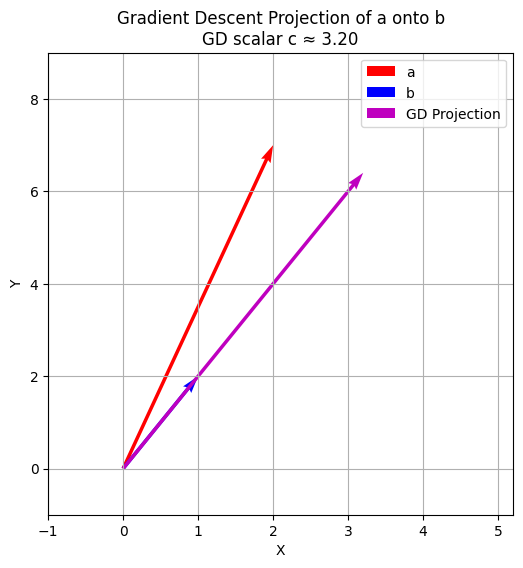

In [16]:
plt.figure(figsize=(6,6))
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', label='a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='b')
plt.quiver(0, 0, GdProjection[0], GdProjection[1], angles='xy', scale_units='xy', scale=1, color='m', label='GD Projection')
plt.xlim(-1, max(a[0], GdProjection[0], b[0]) + 2)
plt.ylim(-1, max(a[1], GdProjection[1], b[1]) + 2)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'Gradient Descent Projection of a onto b\nGD scalar c ≈ {c:.2f}')
plt.show()

finally we compare numerical difference with the analyitical result: 

In [17]:
# --- Compare numerical difference with the analytical result ---
diff = GdProjection - analyticalProjection 
print("Difference (p_GD - p*) =", diff, "   ||diff|| =", np.linalg.norm(diff))

Difference (p_GD - p*) = [-2.22044605e-15 -4.44089210e-15]    ||diff|| = 4.965068306494546e-15


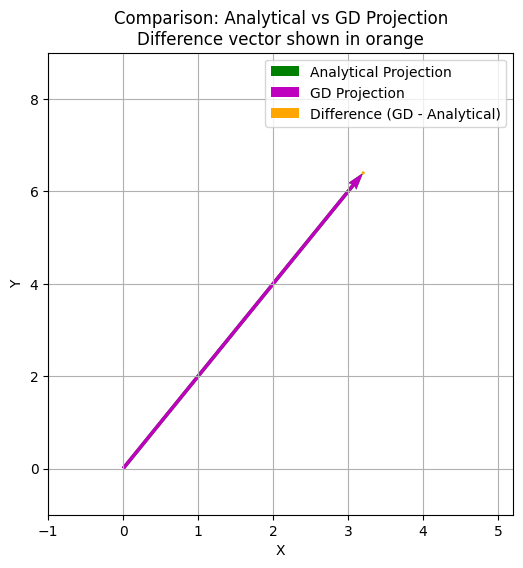

In [18]:
plt.figure(figsize=(6,6))
plt.quiver(0, 0, analyticalProjection[0], analyticalProjection[1], angles='xy', scale_units='xy', scale=1, color='g', label='Analytical Projection')
plt.quiver(0, 0, GdProjection[0], GdProjection[1], angles='xy', scale_units='xy', scale=1, color='m', label='GD Projection')
plt.quiver(analyticalProjection[0], analyticalProjection[1], diff[0], diff[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Difference (GD - Analytical)')
plt.xlim(-1, max(a[0], analyticalProjection[0], GdProjection[0]) + 2)
plt.ylim(-1, max(a[1], analyticalProjection[1], GdProjection[1]) + 2)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Comparison: Analytical vs GD Projection\nDifference vector shown in orange')
plt.show()


### Analytical vs gradient descent



| Aspect | Analytical | Gradient Descent |
|--------|-------------|------------------|
| Method | Closed-form algebraic | Iterative numerical |
| Formula | $$ c^\star = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}} $$ | $$ c_{k+1} = c_k - \eta\,\frac{dJ}{dc} $$ |
| Speed | Instant | Depends on $$ \eta $$ |
| Accuracy | Exact | Approximate (convergent) |
| Insight | Geometric | Optimization-based |


finally we request to copilot from vscode for a better summary for clear reporting: 

In [19]:
# Numerical difference summary (for clear reporting)
diff_norm = np.linalg.norm(diff)
rel_error = diff_norm / np.linalg.norm(analyticalProjection)

print("\n--- Numerical Comparison ---")
print(f"Analytical projection: {analyticalProjection}")
print(f"GD projection:         {GdProjection}")
print(f"Absolute difference:   {diff}  (||diff|| = {diff_norm:.3e})")
print(f"Relative error:        {rel_error:.3e}")
if diff_norm < 1e-10:
    print(" Projections are identical within machine precision.")
else:
    print("  Small numerical difference detected.")



--- Numerical Comparison ---
Analytical projection: [3.2 6.4]
GD projection:         [3.2 6.4]
Absolute difference:   [-2.22044605e-15 -4.44089210e-15]  (||diff|| = 4.965e-15)
Relative error:        6.939e-16
 Projections are identical within machine precision.


 **Summary:**  
This exercise connects **geometry**, **linear algebra**, and **optimization**,  
showing that both analytical and iterative methods describe the same projection in different mathematical frameworks.

## second sub task

### Objective




The goal is to show that both methods converge to the same result, while the gradient descent approach provides an iterative numerical perspective on the minimization of the cost function.

### Theoretical Overview



Given two vectors $$\mathbf{a}, \mathbf{b} \in \mathbb{R}^2$$,  
the projection of $$\mathbf{a}$$ onto $$\mathbf{b}$$ is defined as:

$$
\text{proj}_{\mathbf{b}}(\mathbf{a}) 
= \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}\,\mathbf{b}
$$

To obtain the same result iteratively, we define the **least squares cost function**:

$$
J(c) = \|\mathbf{a} - c\mathbf{b}\|^2
$$

and update the scalar coefficient $$c$$ according to the **gradient descent rule**:

$$
c \leftarrow c - \eta \frac{dJ}{dc} 
= c - \eta[-2(\mathbf{a}\cdot\mathbf{b}) + 2c(\mathbf{b}\cdot\mathbf{b})]
$$

where $$\eta$$ is the learning rate.

Both analytical and gradient descent methods should converge to the same optimal value:

$$
c^* = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}
$$



### Expected Results



- The analytical and gradient descent projections should match up to floating-point precision.  
- The plots of \( c \) and \( J(c) \) should show smooth convergence toward the analytical optimum \( c^* \).  
- The exercise illustrates how a simple least-squares projection problem can be solved both algebraically and iteratively, providing insight into optimization dynamics.


### code implementation 

since, we've already computed both projections (analyitical method and gradient descent), we can proceed confirming its convergence 

first, we calculate the orthogonal resudals 

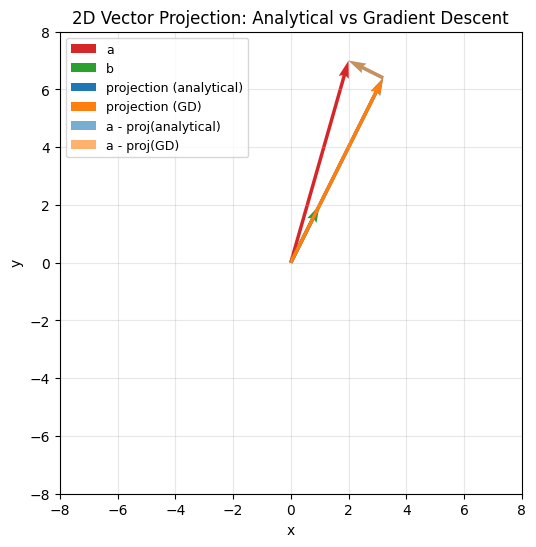

In [20]:
# --- Prepare a square plot so angles/lengths look correct ---
fig, ax = plt.subplots(figsize=(6, 6))

# Set limits so all arrows fit comfortably
stack = np.vstack([a, b, analyticalProjection, GdProjection, a - analyticalProjection, a - GdProjection])
m = np.max(np.abs(stack)) + 1.0
ax.set_xlim(-m, m)
ax.set_ylim(-m, m)
ax.set_aspect("equal", adjustable="box")
ax.grid(alpha=0.3)

# --- Draw original vectors from origin ---
ax.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, label='a', color='C3')
ax.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, label='b', color='C2')

# --- Draw projections from origin ---
ax.quiver(0, 0, analyticalProjection[0], analyticalProjection[1], angles='xy', scale_units='xy', scale=1,
          label='projection (analytical)', color='C0')
ax.quiver(0, 0, GdProjection[0], GdProjection[1], angles='xy', scale_units='xy', scale=1,
          label='projection (GD)', color='C1')

# --- Orthogonal residuals (from projection tip to a) ---
res_a = a - analyticalProjection
ax.quiver(analyticalProjection[0], analyticalProjection[1], res_a[0], res_a[1], angles='xy',
          scale_units='xy', scale=1, color='C0', alpha=0.6, label='a - proj(analytical)')

res_gd = a - GdProjection
ax.quiver(GdProjection[0], GdProjection[1], res_gd[0], res_gd[1], angles='xy',
          scale_units='xy', scale=1, color='C1', alpha=0.6, label='a - proj(GD)')

ax.set_title("2D Vector Projection: Analytical vs Gradient Descent")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc='upper left', fontsize=9)
plt.show()

from the plot, we can inference:
1. The blue and orange projection vectors **overlap almost perfectly**, confirming that both methods reach the **same projected point** within numerical precision.  
2. The residuals  are **orthogonal to b**, showing that the projection satisfies the **least-squares orthogonality condition**.  
3. This confirms that **gradient descent converges** to the same analytical solution obtained directly from vector algebra.

as we see, after training the scalar coefficient \( c \) using gradient descent and computing the analytical projection, both methods yield almost identical results:

$$
\text{proj}_{\text{Analytical}}(\mathbf{a}) \approx \text{proj}_{\text{GD}}(\mathbf{a})
$$

The numerical difference between the two projected vectors is close to zero, confirming that the **gradient descent optimization successfully converged to the analytical solution**, lets proove it 


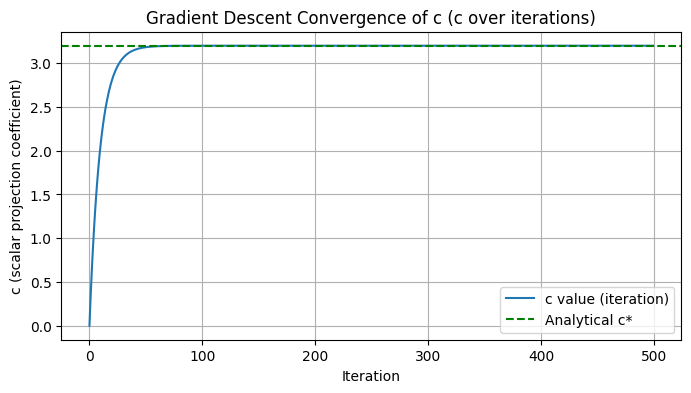

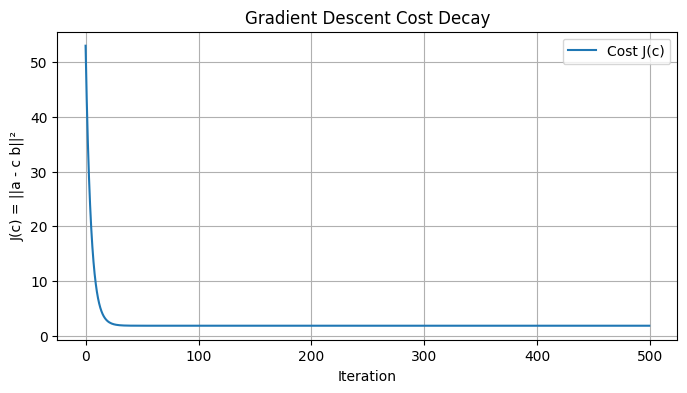

In [23]:

plt.figure(figsize=(8,4))
plt.plot(costHistory, label='c value (iteration)')
plt.axhline(c_star, color='g', linestyle='--', label='Analytical c*')
plt.xlabel('Iteration')
plt.ylabel('c (scalar projection coefficient)')
plt.title('Gradient Descent Convergence of c (c over iterations)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(JHistory, label='Cost J(c)')
plt.xlabel('Iteration')
plt.ylabel('J(c) = ||a - c b||²')
plt.title('Gradient Descent Cost Decay')
plt.legend()
plt.grid(True)
plt.show()


This task demonstrates the projection of a 2D vector **onto another vector** using two complementary approaches:
1. **Analytical Solution** based on the closed-form least squares minimization.
2. **Iterative Solution** using **Gradient Descent** to estimate the same projection coefficient.
3. **Convergence Validation** – both approaches yield identical projection results; the gradient descent solution converges smoothly toward the analytical coefficient $$c^*$$ , confirming the correctness and numerical stability of the iterative optimization process.


## last sub task

### Objective



Implement the **linear projection of two images** (converted into vector form) using two approaches:  
1. The **Analytical Solution** via the closed-form least squares formula.  
2. The **Iterative Solution** using **Gradient Descent** to estimate the same projection coefficient.  

The goal is to extend the 2D vector projection concept to **high-dimensional image data**, where each image is treated as a vector in $${R}^n.$$


### theoretical overview 


$$
\begin{aligned}
&\text{Given two flattened image vectors:} \\[4pt]
&\mathbf{a}, \mathbf{b} \in \mathbb{R}^n \\[10pt]

&\text{The projection of image } \mathbf{a} \text{ onto } \mathbf{b} \text{ is defined as:} \\[6pt]
&\text{proj}_{\mathbf{b}}(\mathbf{a}) 
= \frac{\mathbf{a} \cdot \mathbf{b}}{\mathbf{b} \cdot \mathbf{b}}\,\mathbf{b} \\[10pt]

&\text{where:} \\[4pt]
&\quad \mathbf{a}\cdot\mathbf{b} \text{ is the dot product between the two image vectors,} \\[2pt]
&\quad \mathbf{b}\cdot\mathbf{b} = \|\mathbf{b}\|^2 \text{ is the squared norm of the reference image,} \\[2pt]
&\quad \text{and } \text{proj}_{\mathbf{b}}(\mathbf{a}) \text{ represents the portion of } \mathbf{a} \text{ lying in the direction of } \mathbf{b}. \\[10pt]

&\text{The gradient descent formulation minimizes the least-squares cost:} \\[6pt]
&J(c) = \|\mathbf{a} - c\,\mathbf{b}\|^2 \\[10pt]

&\text{and updates } c \text{ iteratively as:} \\[6pt]
&c \leftarrow c - \eta\,\frac{dJ}{dc}
= c - \eta[-2(\mathbf{a}\cdot\mathbf{b}) + 2c(\mathbf{b}\cdot\mathbf{b})] \\[10pt]

&\text{Both methods converge to the same scalar coefficient:} \\[6pt]
&c^* = \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}
\end{aligned}
$$

### Expected Results



- Both analytical and gradient descent methods should produce **visually identical reconstructed projection images** (after reshaping back to the original image dimensions).  
- The **gradient descent curve** of \( c \) should converge rapidly to $$ c^* $$, and the **cost \( J(c) \)** should decrease monotonically toward zero.  
- Visual comparison will confirm that the projection captures the **shared intensity structure** or **feature correlation** between the two input images.  


### code implementation 

 first we import the libraries and BytesIO to obtain the images

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import requests
from io import BytesIO


proceed obtaining the images from the web 

In [54]:
url_ref = "https://thispersondoesnotexist.com/"
url_mod = "https://thispersondoesnotexist.com/"



and use BytesIO to request the images from the link  

In [55]:

img_ref = Image.open(BytesIO(requests.get(url_ref).content)).convert("L").resize((128, 128))
img_mod = Image.open(BytesIO(requests.get(url_mod).content)).convert("L").resize((128, 128))

also, we do a images preprocess and modify brightness and contrast of second image (simulate same person under diff. lighting and visualize changes on C value) 


In [62]:
# Modify brightness and contrast of second image (simulate same person under diff. lighting)
img_mod1 = ImageEnhance.Brightness(img_mod).enhance(17.7 )
img_mod1 = ImageEnhance.Contrast(img_mod).enhance(3.3) 

now,  plot three images side-by-side: reference, original modified, and brightness/contrast adjusted

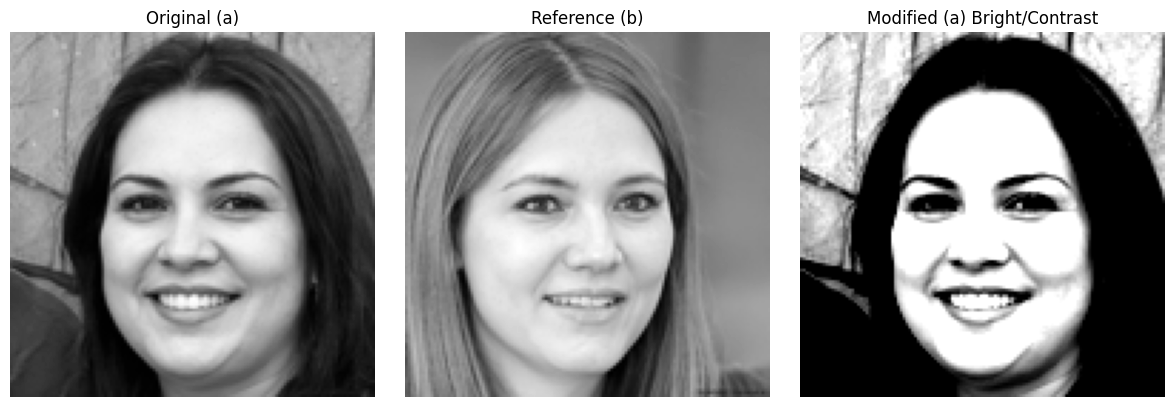

In [64]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.imshow(img_ref, cmap='gray')
plt.title('Reference (b)')
plt.axis('off')

plt.subplot(1, 3, 1)
plt.imshow(img_mod, cmap='gray')
plt.title('Original (a)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_mod1, cmap='gray')
plt.title('Modified (a) Bright/Contrast')
plt.axis('off')

plt.tight_layout()
plt.show()